<a href="https://colab.research.google.com/github/hyunku/Reservoir-Computing/blob/main/pytorch_lowlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.bias1 = torch.zeros(hidden_size, requires_grad=True)
        self.weights2 = torch.randn(hidden_size, output_size, requires_grad=True)
        self.bias2 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x = torch.relu(x @ self.weights1 + self.bias1)
        return x @ self.weights2 + self.bias2

    def backward(self, x, y, learning_rate):
        y_pred = self.forward(x)
        loss = (y_pred - y).pow(2).sum()
        loss.backward()
        
        with torch.no_grad():
            self.weights1 -= self.weights1.grad * learning_rate
            self.bias1 -= self.bias1.grad * learning_rate
            self.weights2 -= self.weights2.grad * learning_rate
            self.bias2 -= self.bias2.grad * learning_rate
            
            self.weights1.grad.zero_()
            self.bias1.grad.zero_()
            self.weights2.grad.zero_()
            self.bias2.grad.zero_()
        
        return loss.item()

input_size = 100
hidden_size = 128
output_size = 10
model = MLP(input_size, hidden_size, output_size)

In [ ]:
import torch

# Define model parameters
input_size = 784
hidden_size = 500
num_classes = 10

# Define model weights and biases
W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.randn(hidden_size, requires_grad=True)
W2 = torch.randn(hidden_size, num_classes, requires_grad=True)
b2 = torch.randn(num_classes, requires_grad=True)

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Define forward pass
def forward(x):
    x = x.view(-1, input_size)
    h = sigmoid(x.mm(W1) + b1)
    out = h.mm(W2) + b2
    return out

# Define loss function and optimization
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.001

# Train the model
for epoch in range(100):
    # Generate fake data
    data = torch.randn(64, input_size)
    target = torch.randint(0, num_classes, size=(64,))
    
    # Forward pass
    outputs = forward(data)
    loss = criterion(outputs, target)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()



In [ ]:
import torch

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.w1 = torch.randn(input_size, hidden_size)
        self.b1 = torch.zeros(hidden_size)
        self.w2 = torch.randn(hidden_size, output_size)
        self.b2 = torch.zeros(output_size)

    def forward(self, x):
        x = x.reshape(-1, self.input_size)
        z1 = x.mm(self.w1) + self.b1
        a1 = z1.clamp(min=0)
        z2 = a1.mm(self.w2) + self.b2
        logits = z2
        return logits

model = MLP(input_size=784, hidden_size=500, output_size=10)

criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.01

for epoch in range(1000):
    total_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        logits = model(inputs)
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Manually calculate the gradients
        grad_logits = criterion.backward()
        grad_w2 = a1.t().mm(grad_logits)
        grad_b2 = grad_logits.sum(0)
        grad_a1 = grad_logits.mm(w2.t())
        grad_z1 = grad_a1.clone()
        grad_z1[z1 < 0] = 0
        grad_w1 = x.t().mm(grad_z1)
        grad_b1 = grad_z1.sum(0)

        # Update the weights and biases
        model.w1 -= learning_rate * grad_w1
        model.b1 -= learning_rate * grad_b1
        model.w2 -= learning_rate * grad_w2
        model.b2 -= learning_rate * grad_b2

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {total_loss / len(train_loader)}')


In [25]:
# imsi
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

data = np.loadtxt('/content/gdrive/MyDrive/ReservoirComputing/MackeyGlass_t17.txt')

trainlen = 2000
future = 2000

X_train = np.ones(trainlen)
Y_train = data[:trainlen]
X_test = np.ones(future)
Y_test = data[trainlen:trainlen+future]


class CustomDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels
        # self.inputs = torch.from_numpy(inputs).type(torch.FloatTensor) # numpy -> torch float32(float)
        # self.labels = torch.from_numpy(labels).type(torch.FloatTensor) # numpy -> torch float32(float)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        return self.inputs[index], self.labels[index]


# Create the train and test loaders
train_dataset = CustomDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

test_dataset = CustomDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.w1 = torch.randn(input_size, hidden_size, requires_grad=True, dtype=torch.float64) # float64
        self.b1 = torch.zeros(hidden_size, requires_grad=True, dtype=torch.float64)
        self.w2 = torch.randn(hidden_size, output_size, requires_grad=True, dtype=torch.float64)
        self.b2 = torch.zeros(output_size, requires_grad=True, dtype=torch.float64)

    def forward(self, x):
        x = x.reshape(-1, self.input_size)
        z1 = x @ self.w1 + self.b1
        a1 = z1.clamp(min=0)
        z2 = a1 @ self.w2 + self.b2
        logits = z2
        return logits

# Set the learning rate
learning_rate = 0.01

# Initialize the model
model = MLP(input_size=1, hidden_size=500, output_size=1)

# Define the loss function
criterion = torch.nn.MSELoss()

# Train the model
for epoch in range(1000):
    total_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        logits = model(inputs)
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backpropagate the loss
        loss.backward()

        # Update the weights and biases
        with torch.no_grad():
            model.w1 -= learning_rate * model.w1.grad
            model.b1 -= learning_rate * model.b1.grad
            model.w2 -= learning_rate * model.w2.grad
            model.b2 -= learning_rate * model.b2.grad

            # Zero the gradients for the next iteration
            model.w1.grad.zero_()
            model.b1.grad.zero_()
            model.w2.grad.zero_()
            model.b2.grad.zero_()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {total_loss / len(train_loader)}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        logits = model(inputs)
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("Accuracy:", correct / total)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 0.04669184591576165
Epoch [200/1000], Loss: 0.04669184591576165
Epoch [300/1000], Loss: 0.04669184591576165
Epoch [400/1000], Loss: 0.04669184591576165
Epoch [500/1000], Loss: 0.04669184591576165
Epoch [600/1000], Loss: 0.04669184591576165
Epoch [700/1000], Loss: 0.04669184591576165
Epoch [800/1000], Loss: 0.04669184591576165
Epoch [900/1000], Loss: 0.04669184591576165
Epoch [1000/1000], Loss: 0.04669184591576165
Accuracy: 0.0


In [ ]:
import torch

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.w1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.b1 = torch.zeros(hidden_size, requires_grad=True)
        self.w2 = torch.randn(hidden_size, output_size, requires_grad=True)
        self.b2 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x = x.reshape(-1, self.input_size)
        z1 = x @ self.w1 + self.b1
        a1 = z1.clamp(min=0)
        z2 = a1 @ self.w2 + self.b2
        logits = z2
        return logits

# Initialize the model
model = MLP(input_size=784, hidden_size=500, output_size=10)

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.SGD([model.w1, model.b1, model.w2, model.b2], lr=0.01)

# Train the model
for epoch in range(1000):
    total_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        logits = model(inputs)
        loss = criterion(logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    # Print the average loss per epoch
    print("Epoch:", epoch, "Loss:", total_loss / len(train_loader))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        logits = model(inputs)
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("Accuracy:", correct / total)

# 최종 완성 코드

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
# updating

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sys

# data = np.loadtxt('/content/gdrive/MyDrive/ReservoirComputing/MackeyGlass_t17.txt')

# trainlen = 7000
# future = 3000

# X_train = np.ones(trainlen)
# Y_train = data[:trainlen]
# X_test = np.ones(future)
# Y_test = data[trainlen:trainlen+future]

# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

device = torch.device('cuda')
dtype = torch.float
torch.set_default_dtype(dtype)

if dtype == torch.double:
    data = np.loadtxt('/content/gdrive/MyDrive/ReservoirComputing/mg17.csv', delimiter=',', dtype=np.float64)
elif dtype == torch.float:
    data = np.loadtxt('/content/gdrive/MyDrive/ReservoirComputing/mg17.csv', delimiter=',', dtype=np.float32)

print(data.shape) # (10000,2)
X_data = data[:,[0]]
Y_data = data[:,[1]]
# X_data = torch.from_numpy(X_data).to(device)
# Y_data = torch.from_numpy(Y_data).to(device)

X_train = X_data[:5000]
Y_train = Y_data[:5000]
X_test = X_data[5000:]
Y_test = Y_data[5000:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



class TensorData(Dataset): # 전처리(np->tensor 등등 작업)
  
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data) # float32
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len


trainsets = TensorData(X_train, Y_train) # 전처리
trainloader = torch.utils.data.DataLoader(trainsets, batch_size=10, shuffle=False) # 배치처리, 셔플유무

testsets = TensorData(X_test, Y_test)
testloader = torch.utils.data.DataLoader(testsets, batch_size=10, shuffle=False)


class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # float32
        self.w1 = torch.randn(input_size, hidden_size, requires_grad=True) # (인풋노드수, 은닉노드수)
        self.b1 = torch.zeros(hidden_size, requires_grad=True) # (은닉노드수)
        self.w2 = torch.randn(hidden_size, output_size, requires_grad=True)
        self.b2 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        x = x.reshape(-1, self.input_size) # (배치크기, 인풋크기)
        z1 = x @ self.w1 + self.b1 # 인풋값과 weight를 내적한 후 편향을 더해줌
        a1 = z1.clamp(min=0) # 출력값에 relu 씌워줌
        z2 = a1 @ self.w2 + self.b2 
        logits = z2
        return logits


model = MLP(input_size=1, hidden_size=500, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam([model.w1, model.b1, model.w2, model.b2], lr=0.001, weight_decay=1e-7)

loss_ = [] # 그래프를 그리기 위한 loss 저장용 리스트 
n = len(trainloader)

for epoch in range(100): # 400번 학습을 진행한다.

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, start=0): # 무작위로 섞인 32개 데이터가 있는 배치가 하나 씩 들어온다.

        inputs, values = data # data에는 X, Y가 들어있다.

        optimizer.zero_grad() # 최적화 초기화
        
        outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
        loss = criterion(outputs, values) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 설정 
        optimizer.step() # 역전파를 진행하고 가중치 업데이트
        
        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더함. tensor.item() -> 숫자가 하나인 텐서를 텐서가 아닌 값으로 만들어줌
 

    loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산

        
print('Finished Training')

(10000, 2)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
Finished Training


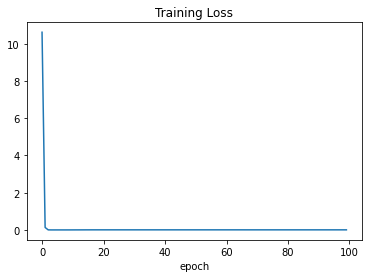

In [22]:
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

In [23]:
def evaluation(dataloader):
    
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서
        
    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)
            predictions = torch.cat((predictions, outputs), 0) # cat을 통해 예측값을 누적
            actual = torch.cat((actual, values), 0) # cat을 통해 실제값을 누적

    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산
    
    return rmse

In [24]:
train_rmse = evaluation(trainloader) # 학습 데이터의 RMSE
test_rmse = evaluation(testloader) # 시험 데이터의 RMSE

print("Train RMSE: ",train_rmse)
print("Test RMSE: ",test_rmse)

Train RMSE:  0.03634298
Test RMSE:  0.03637034


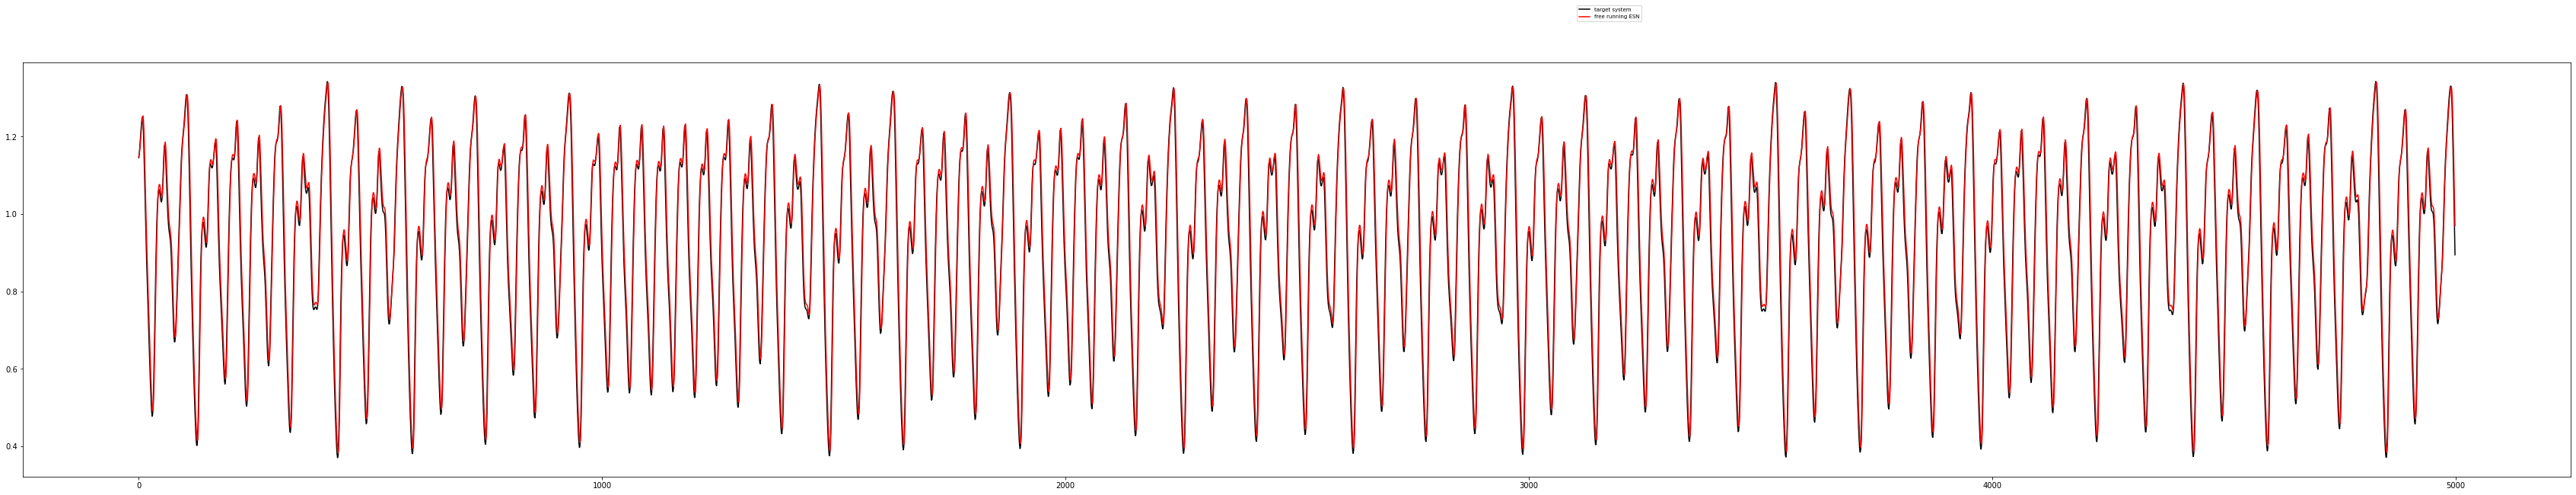

In [30]:
def plotting(train_loader, test_loader, actual):
    with torch.no_grad():
        train_pred = []
        test_pred = []
   
        for data in train_loader:
            inputs, target = data
            out = model(inputs)
            train_pred += out.cpu().numpy().tolist()
            
        for data in test_loader:
            inputs, target = data # 배치 데이터 
            out = model(inputs)
            test_pred += out.cpu().numpy().tolist()

    plt.figure(figsize=(60,10))
    plt.plot(range(len(Y_test)),Y_test,'k',label="target system")
    plt.plot(range(len(Y_test)),test_pred,'r', label="free running ESN")
    lo,hi = plt.ylim()
    # plt.plot([len(X_train),len(X_train)],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(loc=(0.61,1.1),fontsize='x-small')
    
plotting(trainloader, testloader, Y_test)     